In [73]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [74]:
df = pd.read_csv('./concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [75]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [76]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [77]:
X = df.drop(columns='Strength')
y = df['Strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [97]:
# before applying any transform

lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
cv_score = cross_val_score(lr, X, y, scoring='r2')

print(f'''
ACCURACY : 

r2 score = {r2}
Mean cross val score = {np.mean(cv_score)}
''')


ACCURACY : 

r2 score = 0.6249829353885574
Mean cross val score = 0.46099404916628606



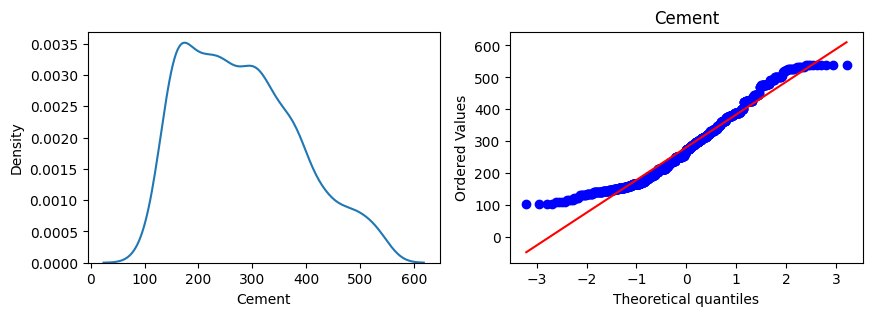

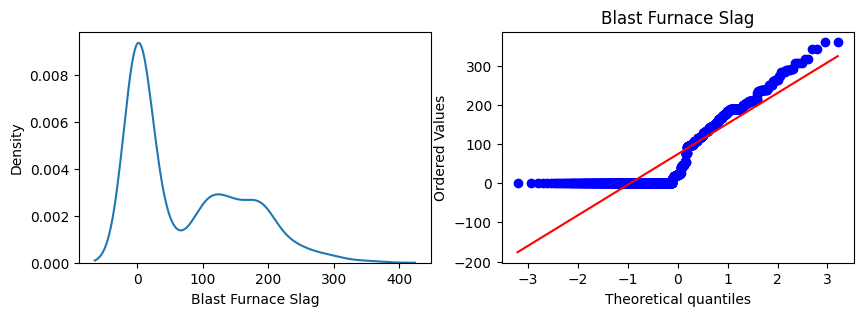

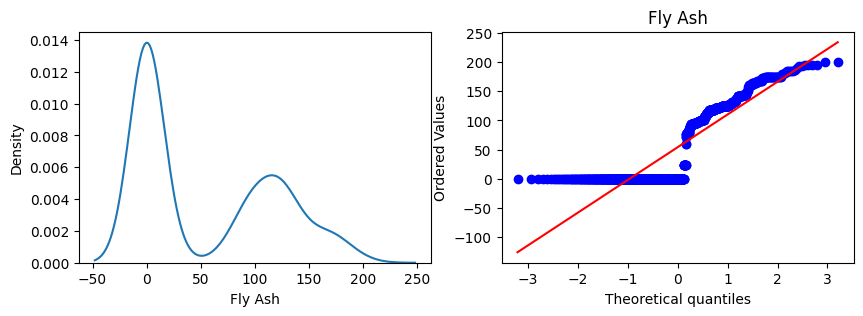

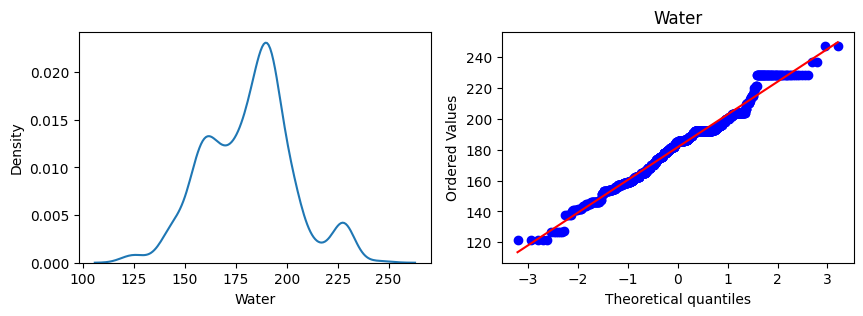

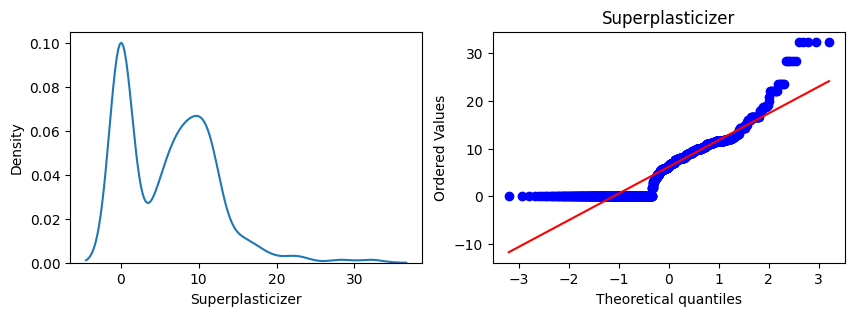

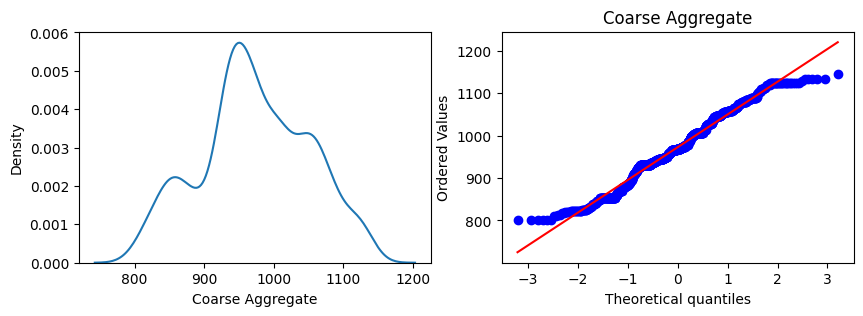

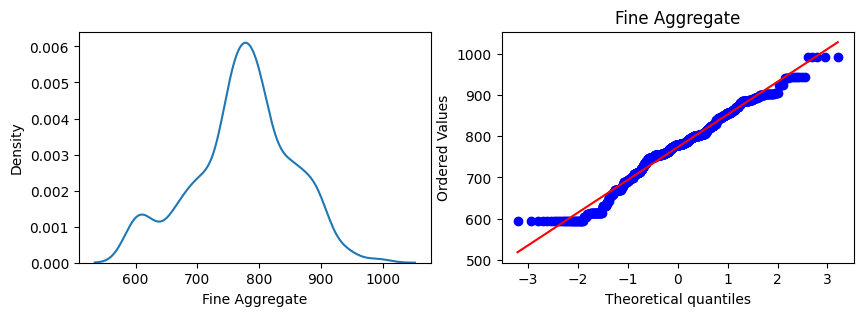

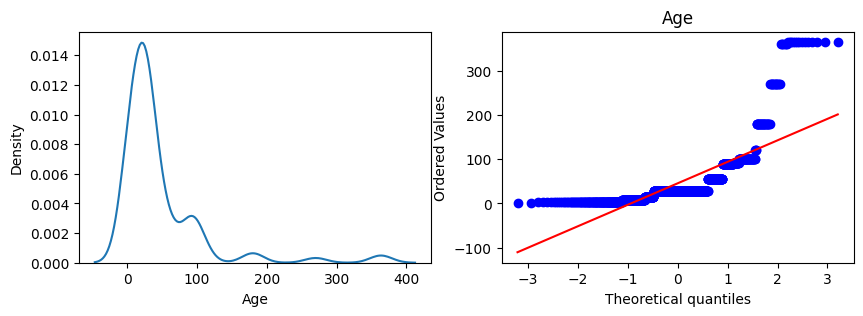

In [65]:
for col in X.columns:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

    sns.kdeplot(data=X, x=col, ax=ax[0])
    stats.probplot(X[col], dist='norm', plot=ax[1])
    plt.title(col)
    plt.show()

In [111]:
# box-cox transformation

pt = PowerTransformer(method='box-cox', standardize=True)

X_transformed = pt.fit_transform(X+0.0000001)    # for cross_val_score
X_train_transformed = pt.fit_transform(X_train+0.0000001)
X_test_transformed = pt.transform(X_test+0.0000001)

lr = LinearRegression()
lr.fit(X_train_transformed, y_train)
y_pred = lr.predict(X_test_transformed)

r2 = r2_score(y_test, y_pred)
cv_score = cross_val_score(lr, X_transformed, y, scoring='r2')

print(f'''
ACCURACY : 

r2 score = {r2}
Mean cross val score = {np.mean(cv_score)}
''')


ACCURACY : 

r2 score = 0.7953053656104834
Mean cross val score = 0.6658537926845631



In [134]:
lambda_values_1 = pd.DataFrame({'Column' : X.columns, 'Box-Cox Lambda Value' : pt.lambdas_})
lambda_values_1

,Column,Box-Cox Lambda Value
0,Cement,0.191971
1,Blast Furnace Slag,0.000482
2,Fly Ash,-0.178001
3,Water,0.850289
4,Superplasticizer,0.231695
5,Coarse Aggregate,1.126614
6,Fine Aggregate,1.860416
7,Age,0.019683


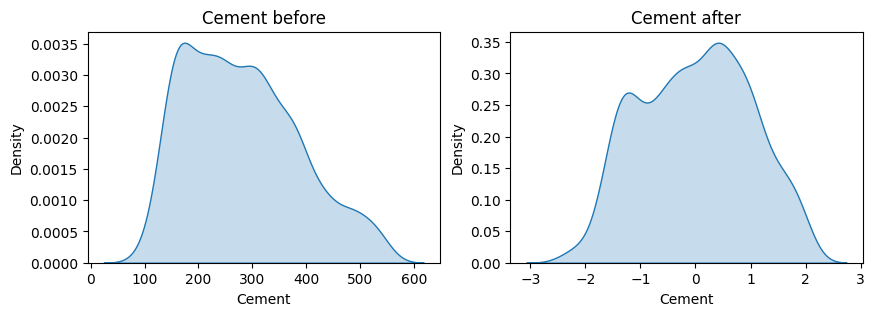

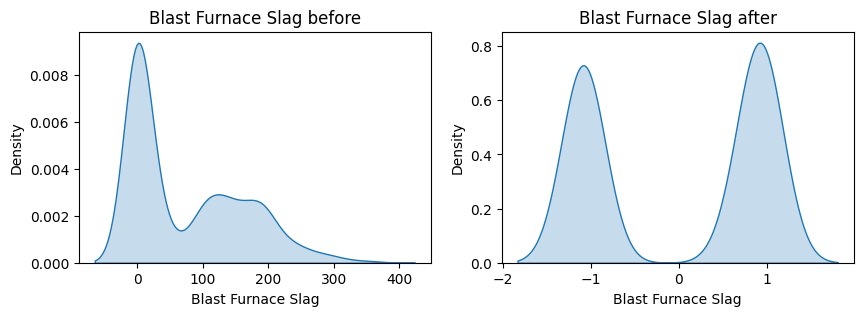

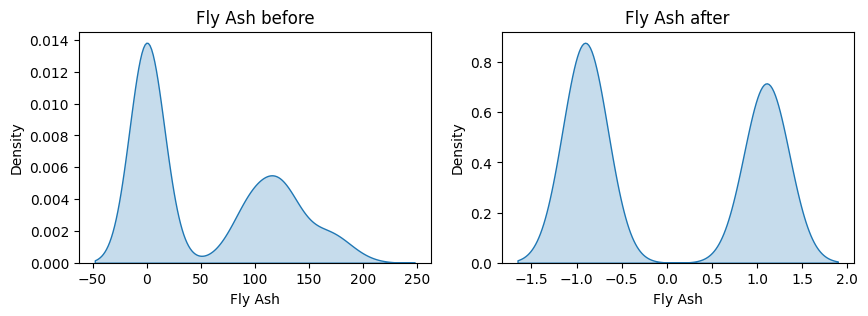

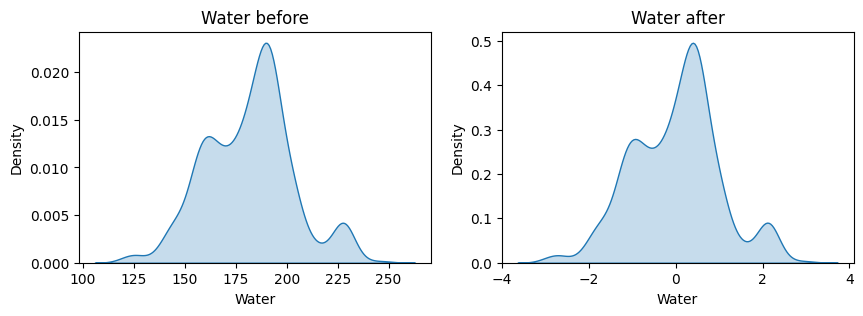

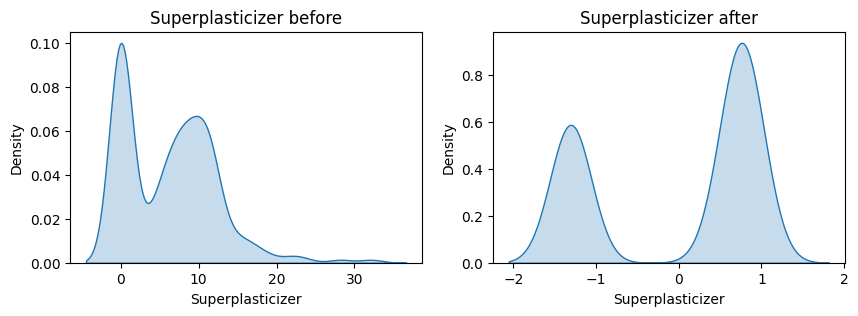

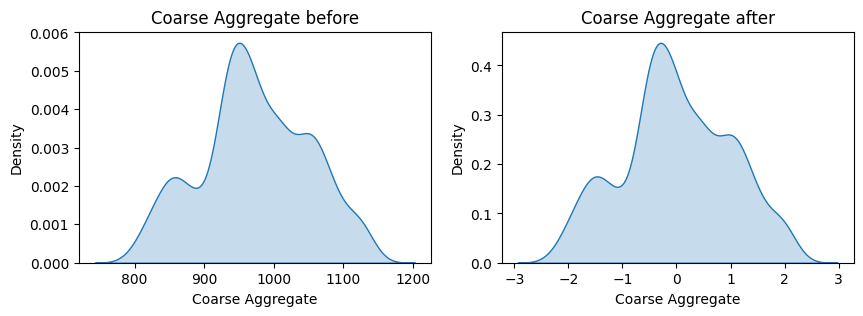

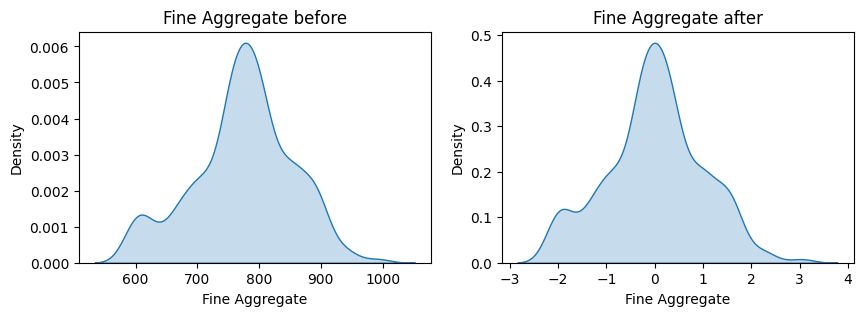

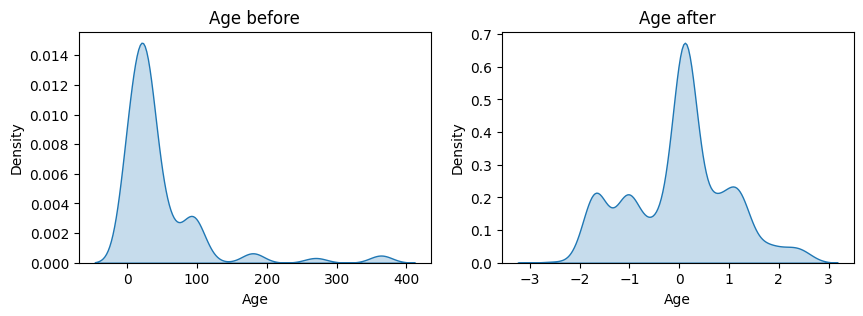

In [130]:
X_transformed = pd.DataFrame(X_transformed, columns=X.columns)

for col in X.columns:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
    sns.kdeplot(data=X, x=col, ax=ax[0], fill=True)
    ax[0].set_title(f'{col} before')
    sns.kdeplot(data=X_transformed, x=col, ax=ax[1], fill=True)
    ax[1].set_title(f'{col} after')

In [132]:
# yeo-johnson transformer

pt = PowerTransformer(method='yeo-johnson', standardize=True)

X_transformed = pt.fit_transform(X)    # for cross_val_score
X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed, y_train)
y_pred = lr.predict(X_test_transformed)

r2 = r2_score(y_test, y_pred)
cv_score = cross_val_score(lr, X_transformed, y, scoring='r2')

print(f'''
ACCURACY : 

r2 score = {r2}
Mean cross val score = {np.mean(cv_score)}
''')


ACCURACY : 

r2 score = 0.8075413175568094
Mean cross val score = 0.6834625141500866



In [142]:
lambda_values_2 = pd.DataFrame({'Column' : X.columns, 'Yeo-Johnson Lambda Value' : pt.lambdas_})
lambda_values_2

,Column,Yeo-Johnson Lambda Value
0,Cement,0.191971
1,Blast Furnace Slag,0.000482
2,Fly Ash,-0.178001
3,Water,0.850289
4,Superplasticizer,0.231695
5,Coarse Aggregate,1.126614
6,Fine Aggregate,1.860416
7,Age,0.019683


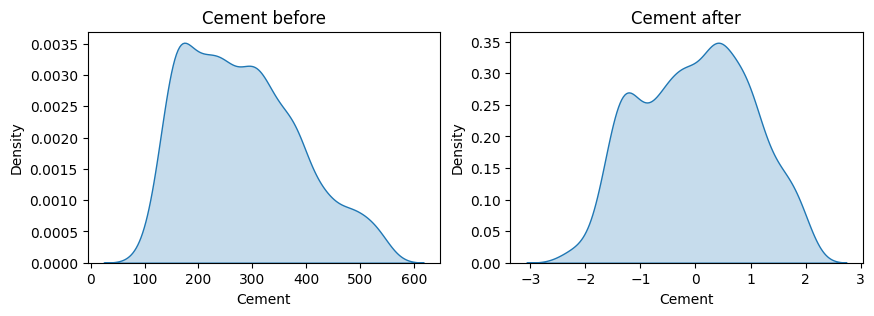

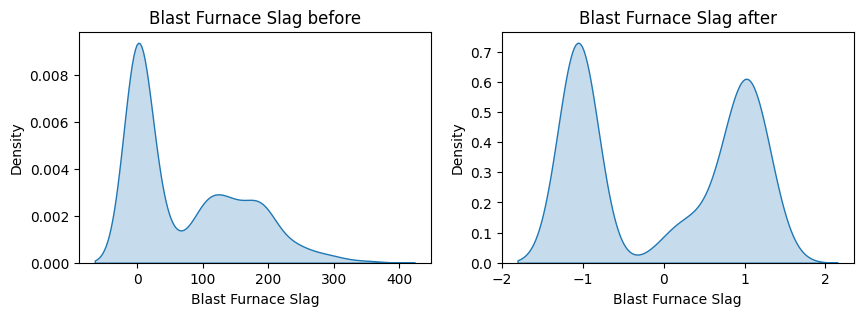

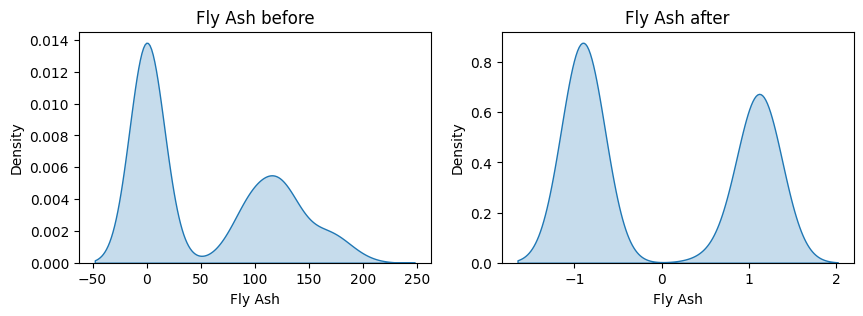

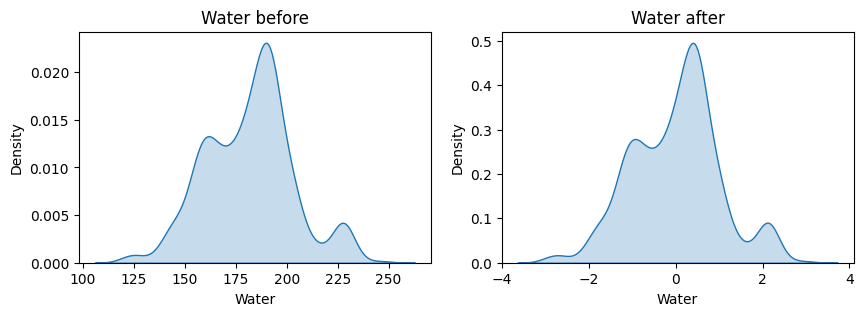

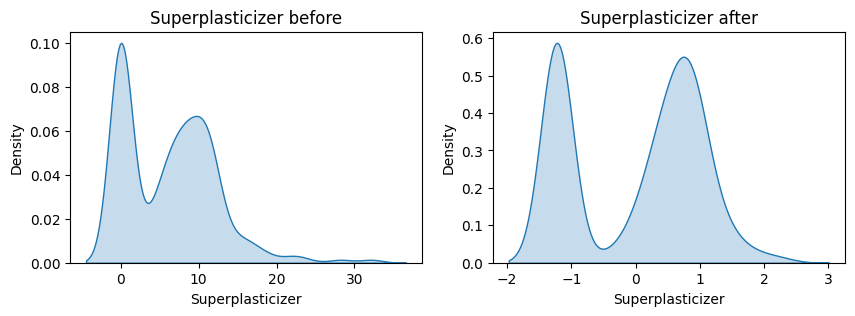

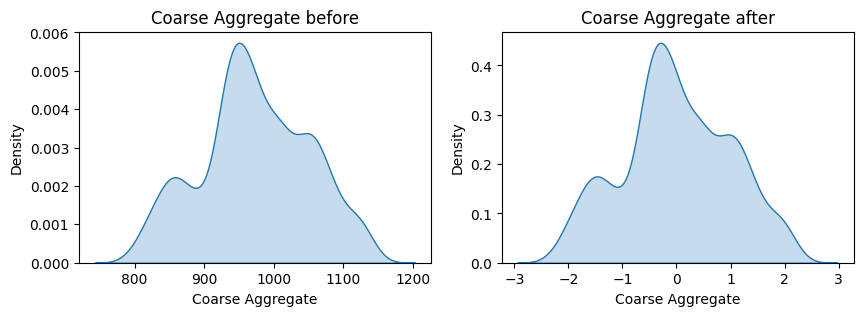

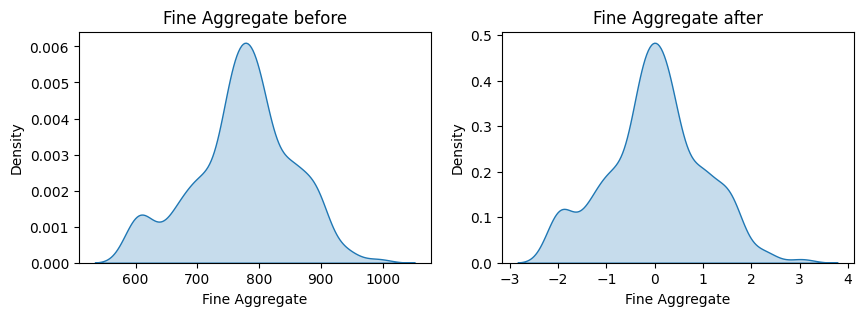

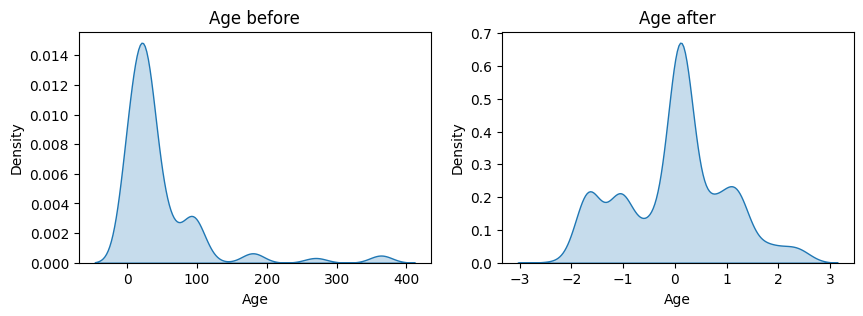

In [135]:
X_transformed = pd.DataFrame(X_transformed, columns=X.columns)

for col in X.columns:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
    sns.kdeplot(data=X, x=col, ax=ax[0], fill=True)
    ax[0].set_title(f'{col} before')
    sns.kdeplot(data=X_transformed, x=col, ax=ax[1], fill=True)
    ax[1].set_title(f'{col} after')

In [143]:
# lambda comparision

pd.DataFrame({
    'Column' : X.columns,
    'Box-Cox lambda value' : lambda_values_1['Box-Cox Lambda Value'],
    'Yeo-Johnson lambda value' : lambda_values_2['Yeo-Johnson Lambda Value']
})

,Column,Box-Cox lambda value,Yeo-Johnson lambda value
0,Cement,0.191971,0.191971
1,Blast Furnace Slag,0.000482,0.000482
2,Fly Ash,-0.178001,-0.178001
3,Water,0.850289,0.850289
4,Superplasticizer,0.231695,0.231695
5,Coarse Aggregate,1.126614,1.126614
6,Fine Aggregate,1.860416,1.860416
7,Age,0.019683,0.019683
